<a href="https://colab.research.google.com/github/krucx/SHALA2020/blob/master/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE

In [0]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

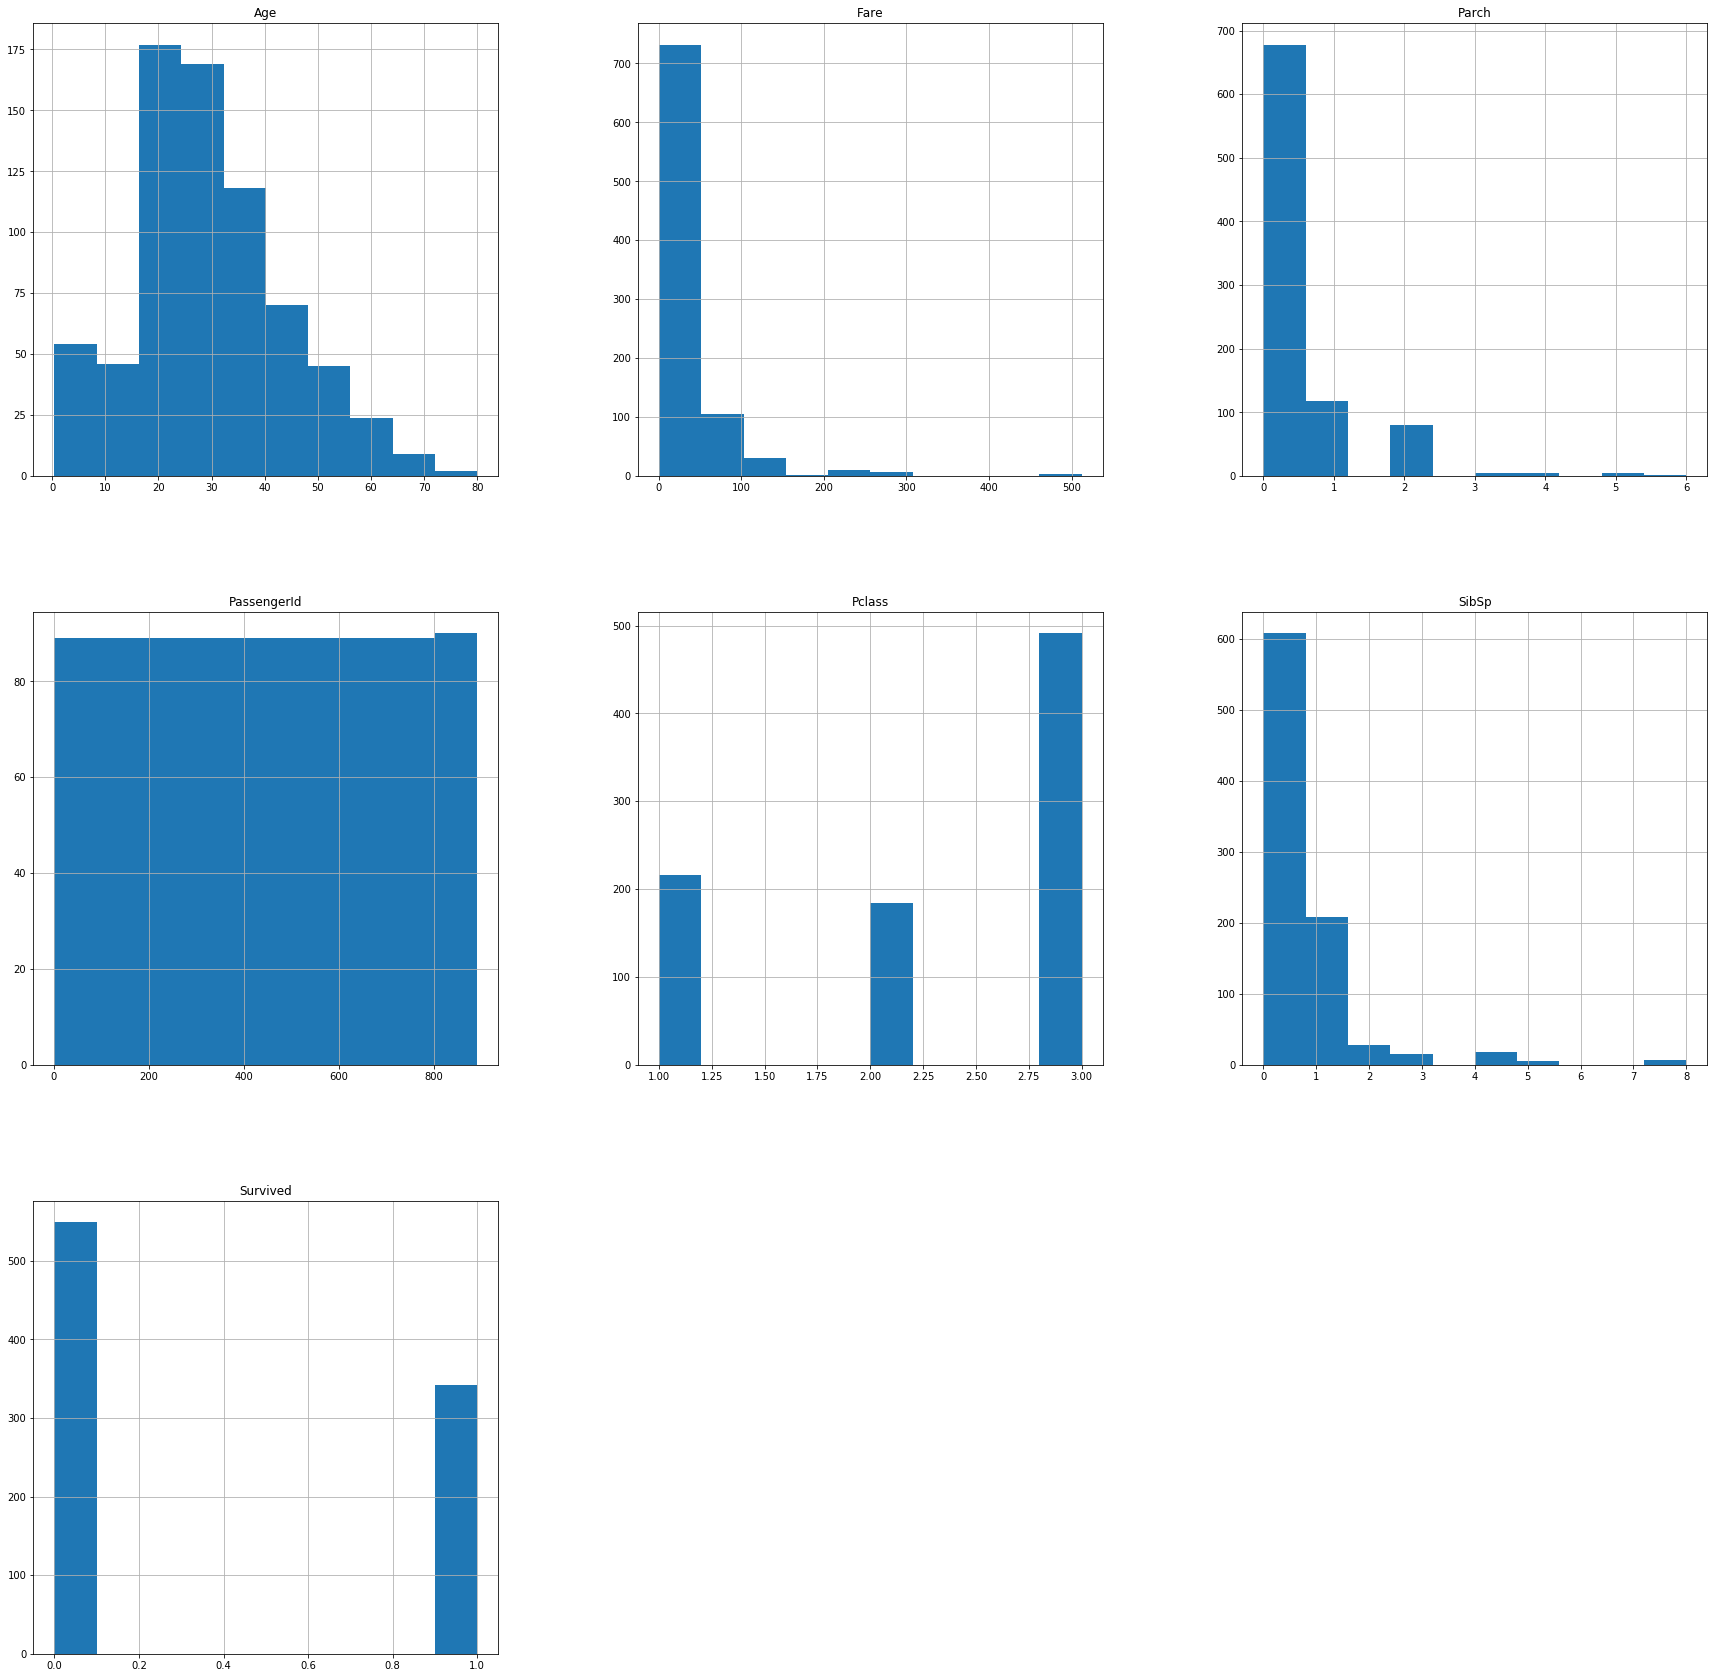

In [0]:
titanic_data.hist(figsize=(30,30))
plt.show()

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
X = titanic_data.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])
CategoricalCols = ["Sex","Embarked"] 
X = pd.get_dummies(data=X,columns=CategoricalCols)
X.fillna(X.mean(),inplace=True)

In [0]:
y = (titanic_data.loc[:,'Survived']).to_numpy()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=111)

The training scores were: 93.4%
The testing scores were: 84.36%
[[102  11]
 [ 17  49]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       113
           1       0.82      0.74      0.78        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



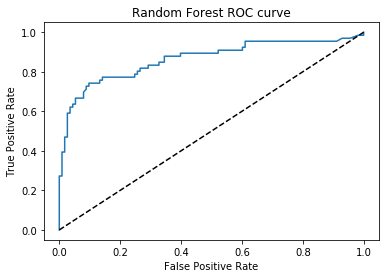

In [0]:
rfc = RandomForestClassifier(n_estimators=270, random_state=1111,max_depth=9,max_features=2)
rfc.fit(X_train, y_train) 
    
print("The training scores were: {}%".format(round(accuracy_score(y_train, rfc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, rfc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, rfc.predict(X_test)))
print("="*60)
print(classification_report(y_test, rfc.predict(X_test)))

probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

The training scores were: 95.93%
The testing scores were: 83.24000000000001%
[[96 17]
 [13 53]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       113
           1       0.76      0.80      0.78        66

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



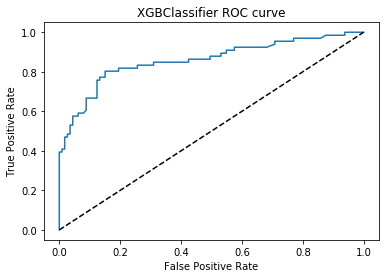

In [0]:
xgbc = XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=200,max_features=2)

xgbc.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, xgbc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, xgbc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, xgbc.predict(X_test)))
print("="*60)
print(classification_report(y_test, xgbc.predict(X_test)))

probs = xgbc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC curve')
plt.show()

The training scores were: 85.0%
The testing scores were: 83.8%
[[98 15]
 [14 52]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       113
           1       0.78      0.79      0.78        66

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



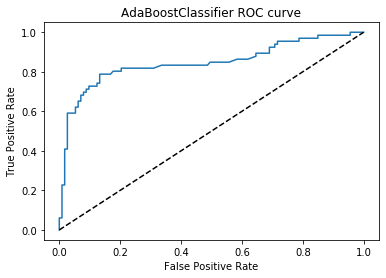

In [0]:
ada = AdaBoostClassifier(learning_rate=0.6,n_estimators=250)

ada.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, ada.predict(X_train)), 2)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, ada.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, ada.predict(X_test)))
print("="*60)
print(classification_report(y_test, ada.predict(X_test)))

probs = ada.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier ROC curve')
plt.show()

In [0]:
classifiers = [('AdaBoostClassifier', ada),
('XGBClassifier', xgbc),
('RandomForestClassifier', rfc)]

import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
    
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

AdaBoostClassifier : 0.838
XGBClassifier : 0.832
RandomForestClassifier : 0.844
Voting classifier:  0.849


In [0]:
# Instantiate a classification-tree 'dt'
dt = XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=200,max_features=2)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.827


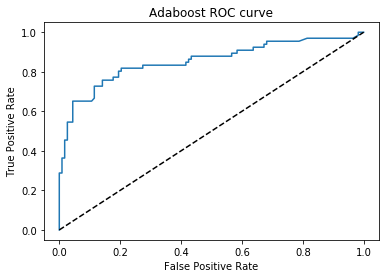

In [0]:
dt = RandomForestClassifier(n_estimators=270, random_state=1111,max_depth=9,max_features=2)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)


from sklearn.metrics import roc_curve  
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC curve')
# show the plot
plt.show()

In [0]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [0]:
xgbc = XGBClassifier(learning_rate=0.03,max_depth=3,n_estimators=200,max_features=3)

xgbc.fit(X_train_res, y_train_res)

print("The training scores were: {}%".format(round(accuracy_score(y_train_res, xgbc.predict(X_train_res)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, xgbc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, xgbc.predict(X_test)))
print("="*60)
print(classification_report(y_test, xgbc.predict(X_test)))

The training scores were: 86.7%
The testing scores were: 82.12%
[[98 15]
 [17 49]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       113
           1       0.77      0.74      0.75        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



Accuracy of Bagging Classifier: 0.816


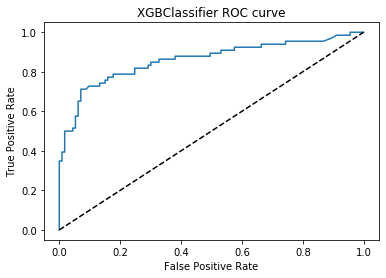

In [0]:
# Instantiate a classification-tree 'dt'
dt = XGBClassifier(learning_rate=0.03,max_depth=6,n_estimators=300,max_features=2)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train_res, y_train_res)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

probs = bc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC curve')
plt.show()

Accuracy of Bagging Classifier: 0.832


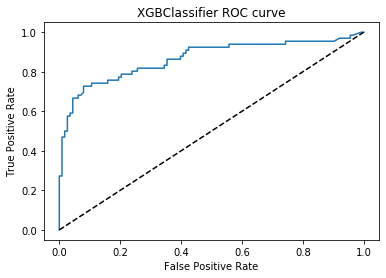

In [0]:
dt = DecisionTreeClassifier(random_state=1111,max_depth=9,max_features=2)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train_res, y_train_res)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

probs = bc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC curve')
plt.show()